# Melodic similarity and distance metrics

## Description


Notebook prepared by Philip Tovstogan for MIR course

In [133]:
# Import modules
import os
import numpy as np
import scipy.spatial.distance as dist
import urllib.request as req
import matplotlib.pyplot as plt
import music21 as m21
%matplotlib inline

In [204]:
# Download data
try:
    os.mkdir('data')
except FileExistsError:
    pass

url = 'http://kern.humdrum.org/cgi-bin/ksdata?file=ukrain04.krn&l=essen/europa/ukraina&format=kern'
#url = 'http://kern.humdrum.org/cgi-bin/ksdata?file=ukrain06.krn&l=essen/europa/ukraina&format=kern'
req.urlretrieve(url, 'data/1.krn')
data = m21.converter.parse('data/1.krn')

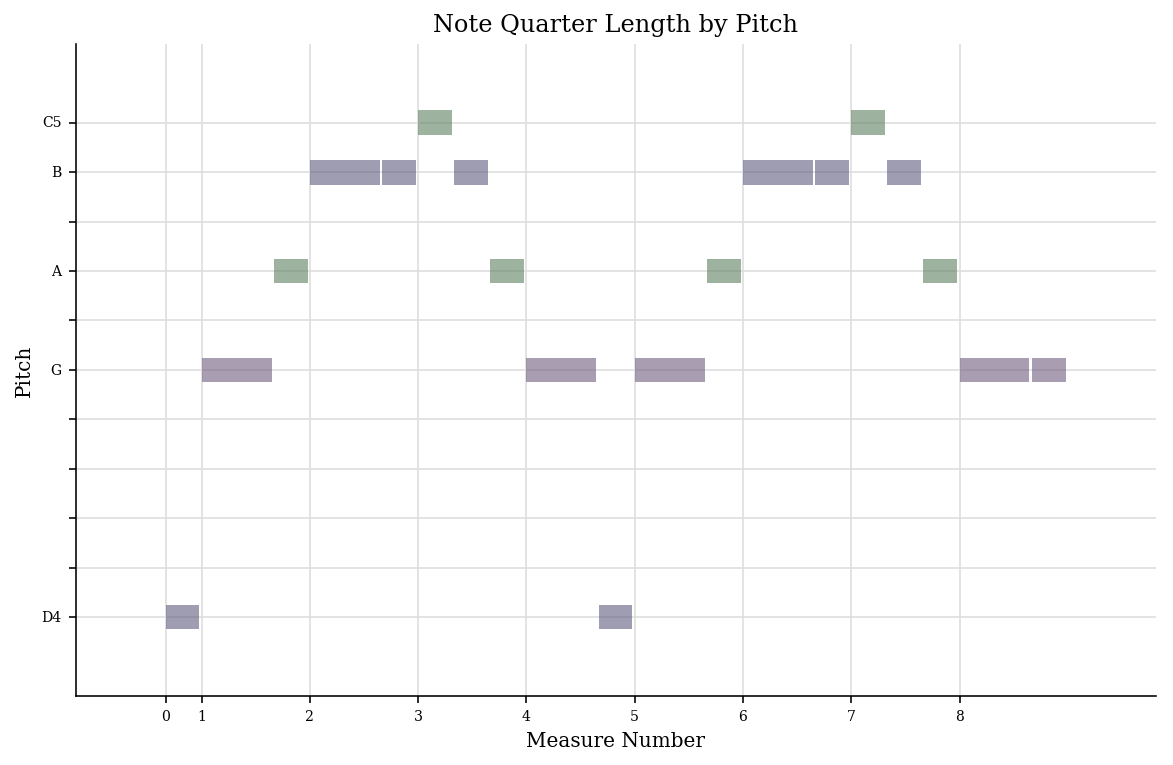

In [206]:
notes = data.recurse().notes
data.measures(0,8).plot()

In [210]:
# Split equally, TODO: split by duration
n_segments = 4
total_notes = len(notes)
notes_per_segment = total_notes // n_segments
phrases = [[] for i in range(n_segments)]

index = 0
min_duration = 1.0

for note in notes:
    phrases[index // notes_per_segment].append(note)
    min_duration = min(min_duration, note.duration.quarterLength)
    index += 1


In [199]:
# Split by factor
# stop_factor = 2  # split phrase when duration of the note increases beyond this factor
# phrases = [[]]

# index = 0

# min_duration = 1.0
# split_after = False
# prev_duration = None

# for note in notes:
#     if split_after:
#         phrases.append([])
#         prev_duration = None
        
#     duration = note.duration.quarterLength
#     split_after = prev_duration is not None and duration / prev_duration > stop_factor
#     phrases[-1].append(note)
#     prev_duration = duration
#     min_duration = min(min_duration, note.duration.quarterLength)
#     index += 1

In [212]:
contours = []

for phrase in phrases:
    ref_midi = None
    contour = []
    
    for note in phrase:
        if ref_midi is None:
            ref_midi = note.pitch.midi
        midi_relative = note.pitch.midi - ref_midi
        duration = int(np.ceil(note.duration.quarterLength / min_duration))
        contour += [midi_relative] * duration
    
    contours.append(contour)
    
contours = np.array(contours)

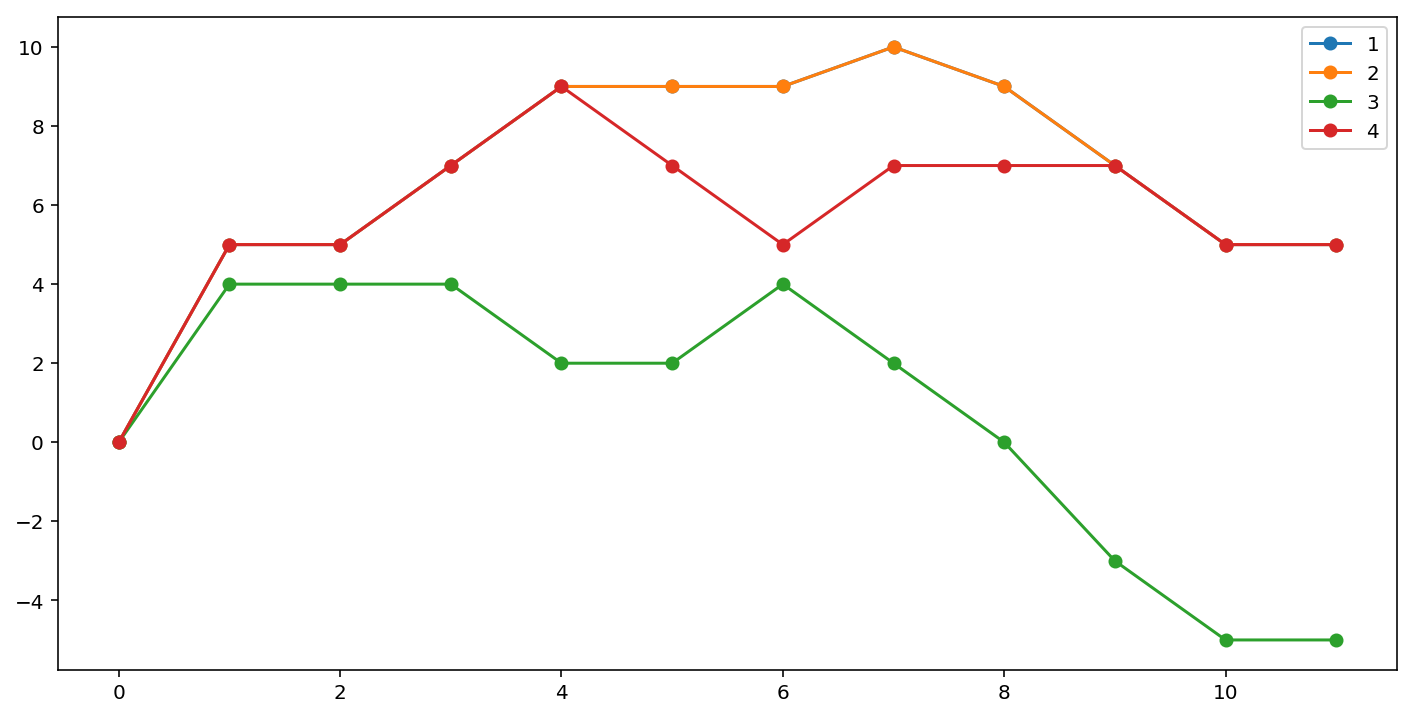

In [213]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
for contour in contours:
    ax.plot(contour, marker='o')
    
labels = np.arange(n_segments) + 1
plt.legend(labels)

## Measuring distance
There are many different distance metrics that can be used, but we will focus on:
* Cityblock (L1)
* Euclidean (L2)
* Correlation ($1 - \frac{ (u - \bar{u}) (v - \bar{u})} {|u - \bar{u}| |v - \bar{u}| }$)

In [219]:
metrics = ['euclidean', 'cityblock', 'correlation']
results = {}
for metric in metrics:
    results[metric] = dist.pdist(contours, metric=metric)

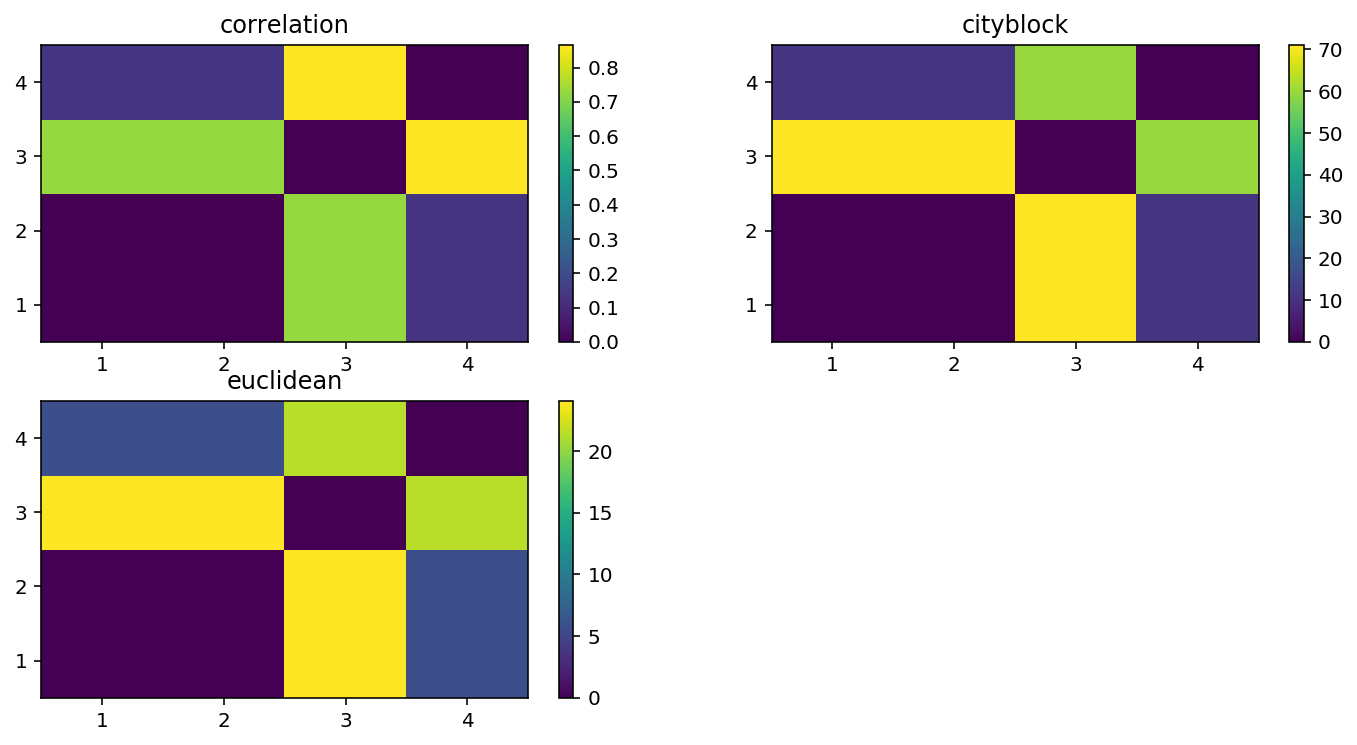

In [220]:
num_plots = len(metrics)
plt.figure(figsize=(12, num_plots*2))

index = 1
for metric, distances in results.items():
    plt.subplot(np.ceil(num_plots/2), 2, index)
    
    plt.pcolor(dist.squareform(distances))
    plt.colorbar()
    
    ax = plt.gca()
    ax.set_title(metric)
    ticks = np.arange(n_segments) + 0.5
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    index +=1
    